<a href="https://colab.research.google.com/github/amiralitalebi/CW_MN3B/blob/main/Part_2_Group_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air Quality in India – Linear Regression with SHAP**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import shap

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

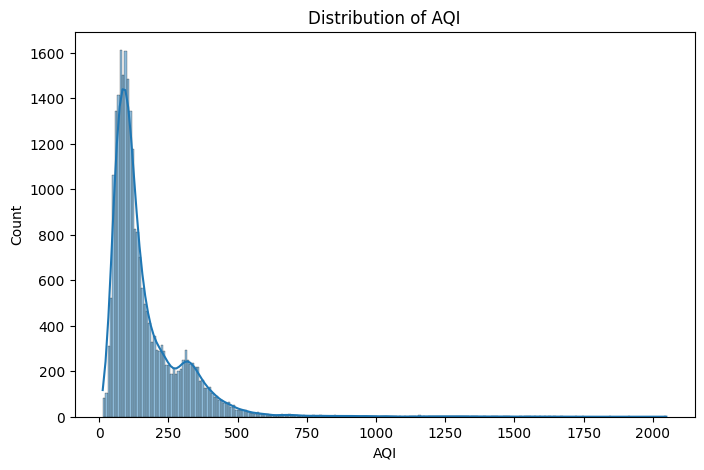

<Figure size 1200x800 with 0 Axes>

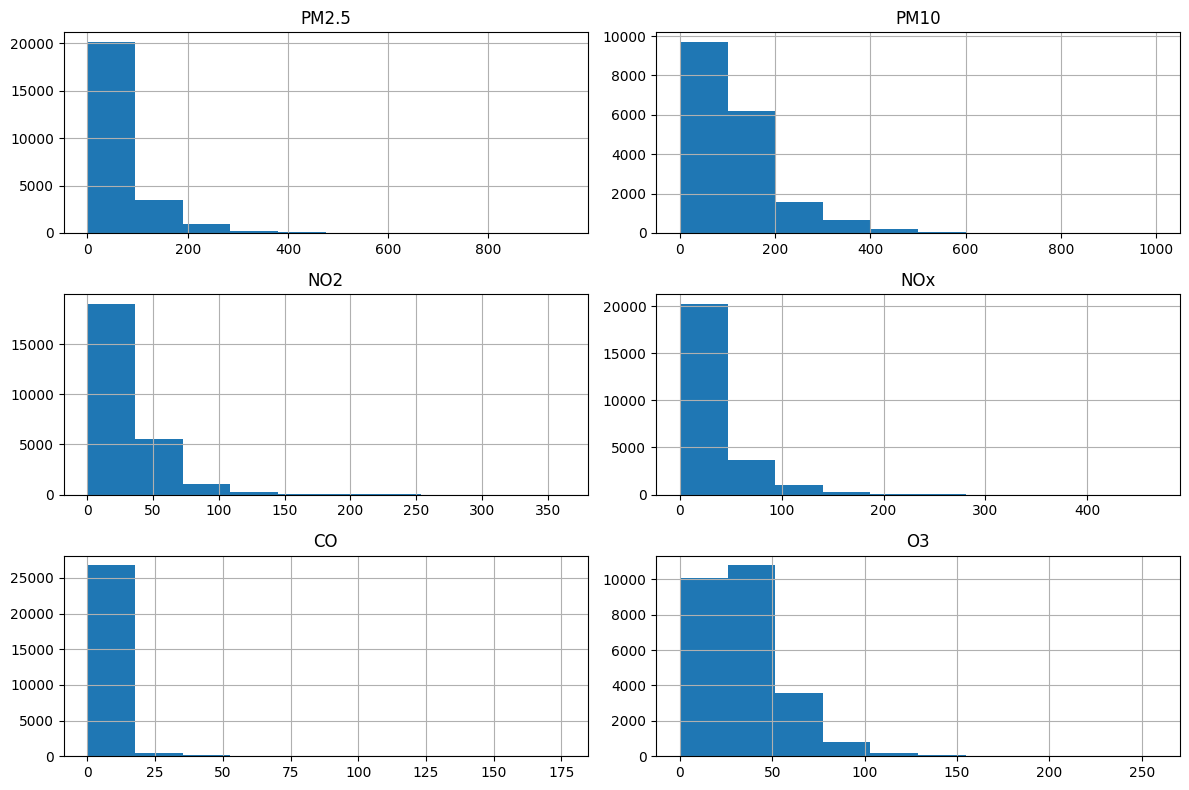

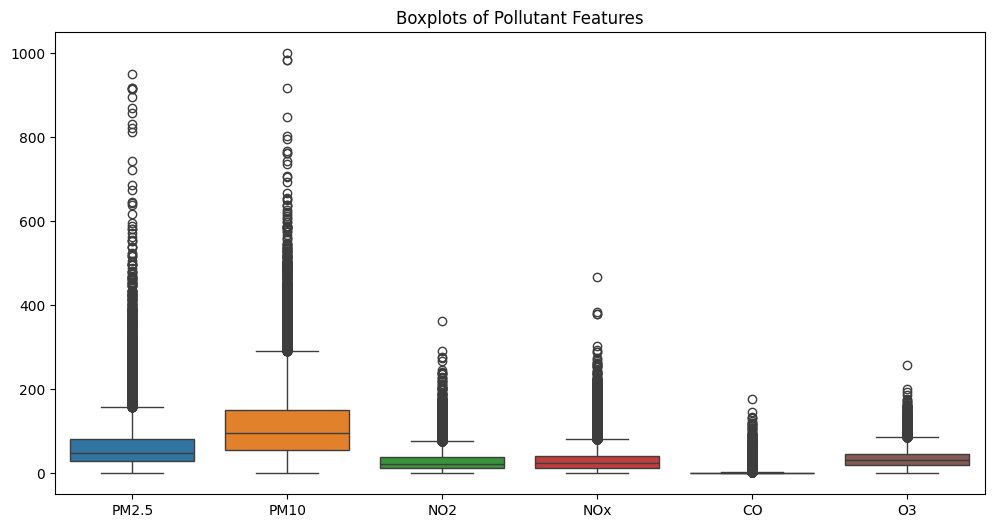

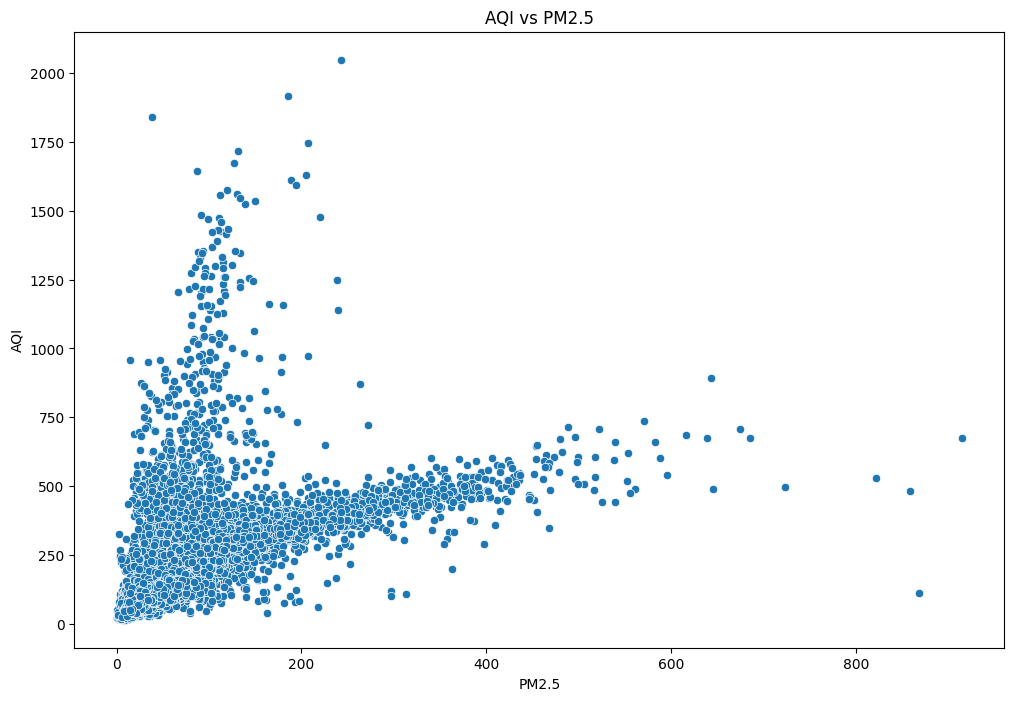

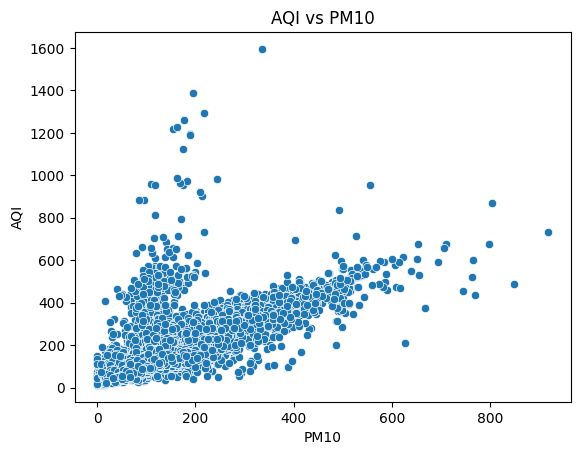

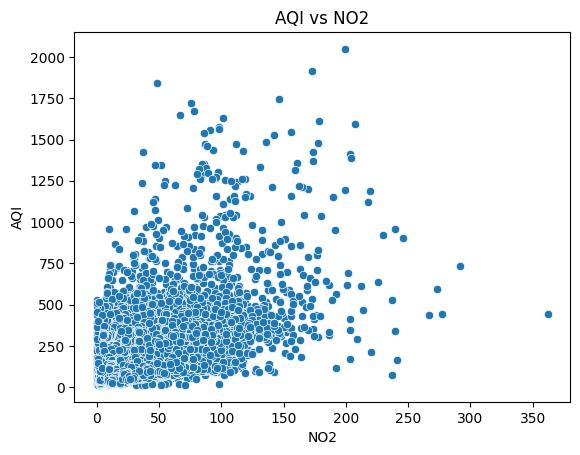

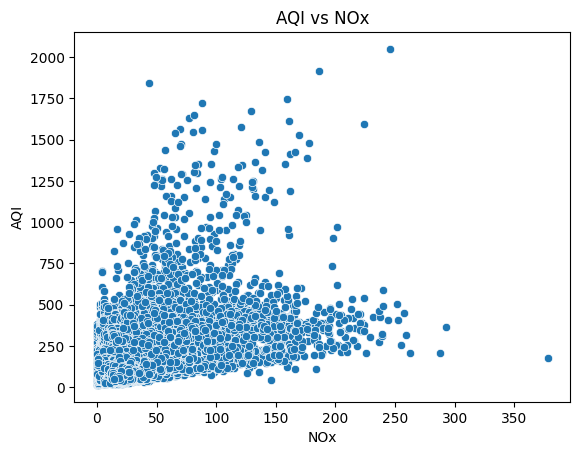

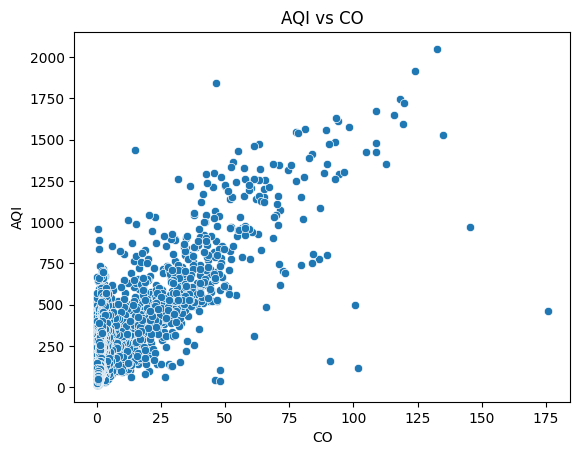

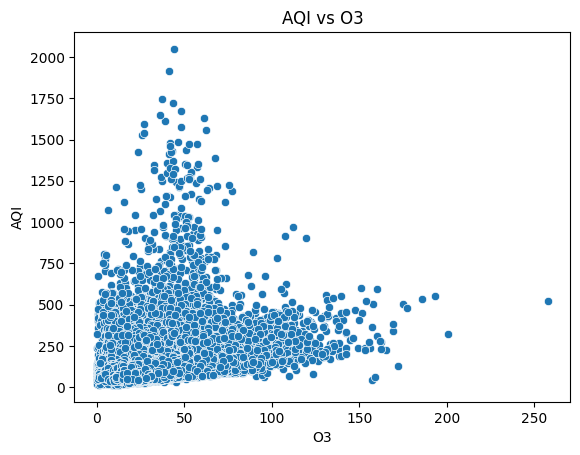

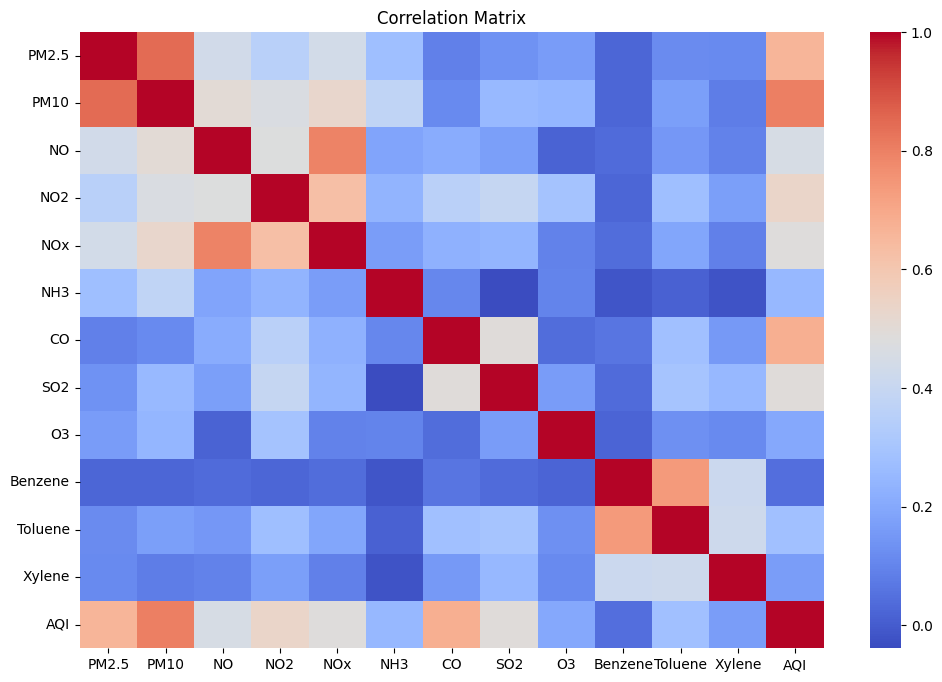

In [ ]:
# Loading the Dataset

df = pd.read_csv("city_day.csv")

print(df.head())
print(df.info())
print(df.describe())


# ============================================================
# Exploratory Data Analysis (EDA)
# ============================================================

# Checking the first few rows
print(df.head())

# Looking at the structure of the dataset
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# ------------------------------------------------------------
# Distribution of the target variable (AQI)
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["AQI"], kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.show()

# ------------------------------------------------------------
# Histograms for key pollutant features
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
df[["PM2.5","PM10","NO2","NOx","CO","O3"]].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Boxplots to check for outliers
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["PM2.5","PM10","NO2","NOx","CO","O3"]])
plt.title("Boxplots of Pollutant Features")
plt.show()

# ------------------------------------------------------------
# Scatter plots to examine relationships between AQI and pollutants
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for col in ["PM2.5","PM10","NO2","NOx","CO","O3"]:
    sns.scatterplot(x=df[col], y=df["AQI"])
    plt.title(f"AQI vs {col}")
    plt.xlabel(col)
    plt.ylabel("AQI")
    plt.show()

# ------------------------------------------------------------
# Correlation heatmap for numeric features only
# ------------------------------------------------------------
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
# Data cleaning and preparation
# Remove rows where AQI is missing
df = df.dropna(subset=["AQI"])

# Drop remaining missing values (simple approach used in labs)
df = df.dropna()

# Convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

# Extract year and month as features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month


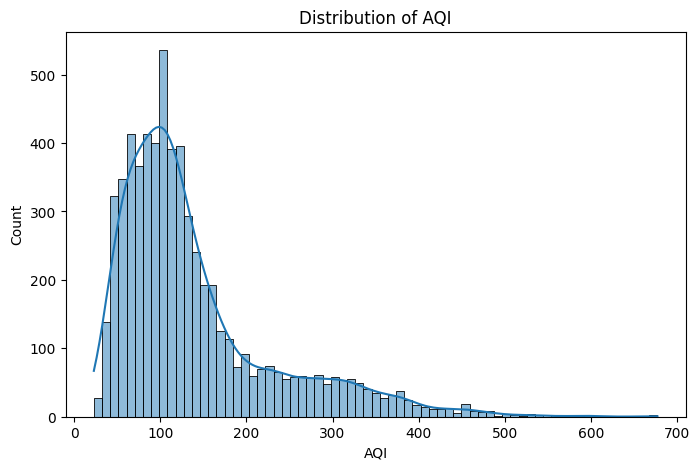

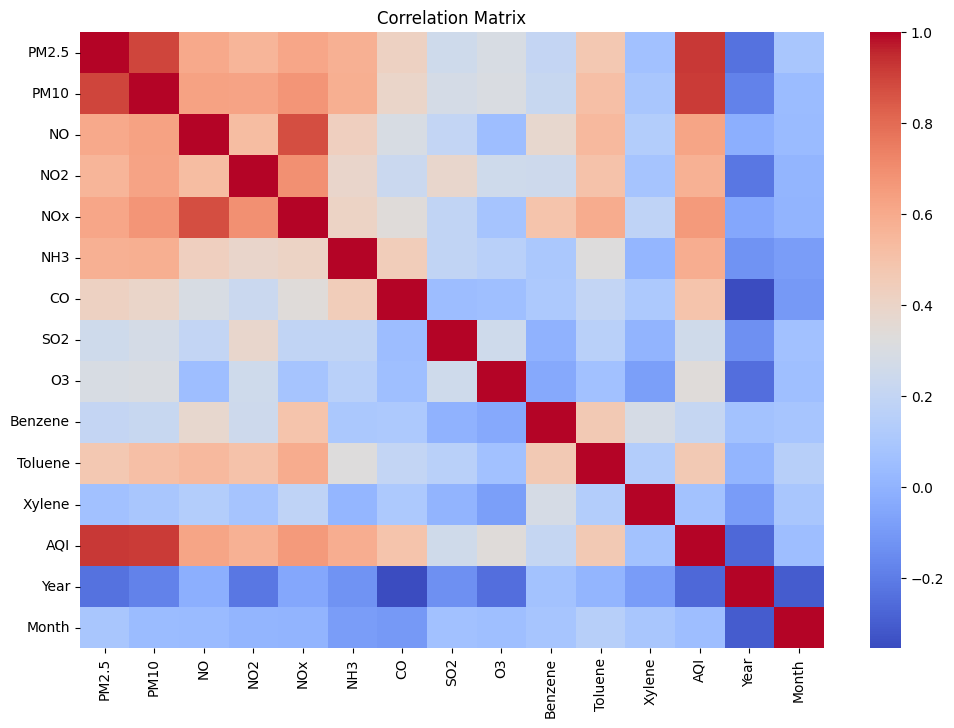

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(8,5))
sns.histplot(df["AQI"], kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Linear Regression Analysis**

The linear regression model performed strongly on the Air Quality India dataset.
The evaluation metrics were:

• MAE ≈ 17.89

• MSE ≈ 641

• RMSE ≈ 25.31

• R² ≈ 0.923

An R² value of about 0.92 means the model explains roughly 92 percent of the variation in AQI. This is unusually high but still reasonable for this dataset.

There are several factors that contribute to this strong performance. The dataset became much cleaner after removing rows containing missing values, which reduces noise.

Using only complete records also limits the influence of extreme outliers.
Key pollutants such as PM2.5, PM10 and NOx have a strong direct effect on AQI, so the model benefits from these highly informative features.
Including Year and Month captures seasonal variation in pollution levels, which improves predictive accuracy further.

Overall, the linear regression model provides a reliable baseline for AQI prediction and shows that pollutant concentrations combined with seasonal patterns can effectively explain most changes in air quality.

In [ ]:
# Feature selection
# Typical pollutant features used for prediction
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3",
            "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene",
            "Year", "Month"]

X = df[features]
y = df["AQI"]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)


MAE: 17.89011336286393
MSE: 641.0539954334924
RMSE: 25.3190441255884
R²: 0.9229521899793021


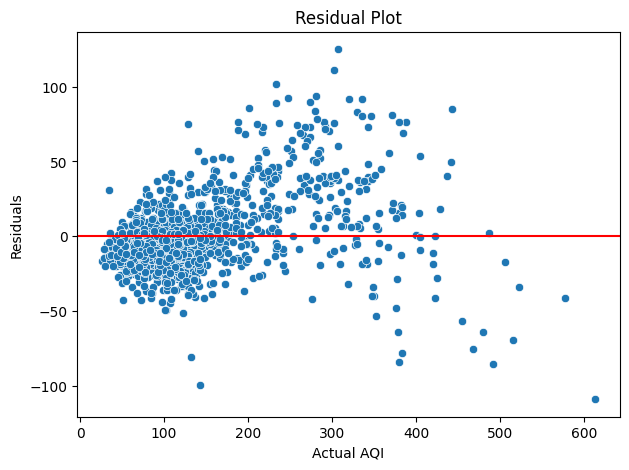

In [ ]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color="red")
plt.xlabel("Actual AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



**Residual Plot Analysis**

The residual plot shows that most residual values are grouped close to zero, which indicates that the model is not consistently over-predicting or under-predicting AQI. A few points at high-AQI levels have wider spread, which is expected because extreme pollution days are harder to model accurately. There are no curved shapes, funnels or repeating patterns in the residuals. This means the linear regression assumptions are reasonable for this dataset and the model errors behave normally.

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_r2 = r2_score(y_test, tree_pred)

print("Linear Regression R²:", r2)
print("Ridge Regression R²:", ridge_r2)
print("Lasso Regression R²:", lasso_r2)
print("Decision Tree R²:", tree_r2)

Linear Regression R²: 0.9229521899793021
Ridge Regression R²: 0.9229521534175565
Lasso Regression R²: 0.922702658896784
Decision Tree R²: 0.8977665084329909


**Comparing Linear Regression to other regression models**

Linear Regression achieved the highest R² value, indicating that it explains the variation in AQI better than Ridge, Lasso or the Decision Tree. Ridge and Lasso performed slightly lower because regularisation reduces the influence of some pollutant variables, which weakens the model for this dataset. The Decision Tree Regressor showed the lowest R², mainly due to overfitting noise and outliers in the pollutant measurements. Overall, Linear Regression is the most stable and interpretable model for this dataset, and works well because AQI relates linearly to PM2.5, PM10 and NOx.

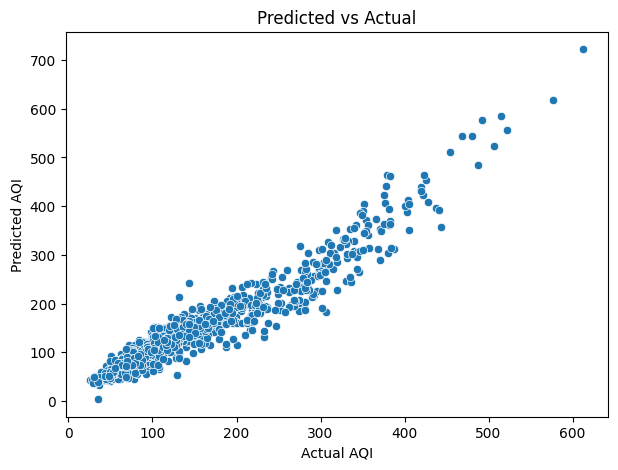

In [ ]:
# Predicted vs Actual
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual")
plt.show()


**Predicted vs Actual AQI**

The predicted versus actual plot shows that most points lie close to the diagonal line, which means the model is producing accurate predictions for a wide range of AQI values. A small number of outliers appear at very high AQI levels, which is typical for days with unusual pollution spikes. The overall trend is straight and consistent, without distortions. This agrees with the high R² value and confirms that the model fits the data well.


A regression line is not plotted because the model uses multiple features. Simple regression visuals apply only to models with one predictor.

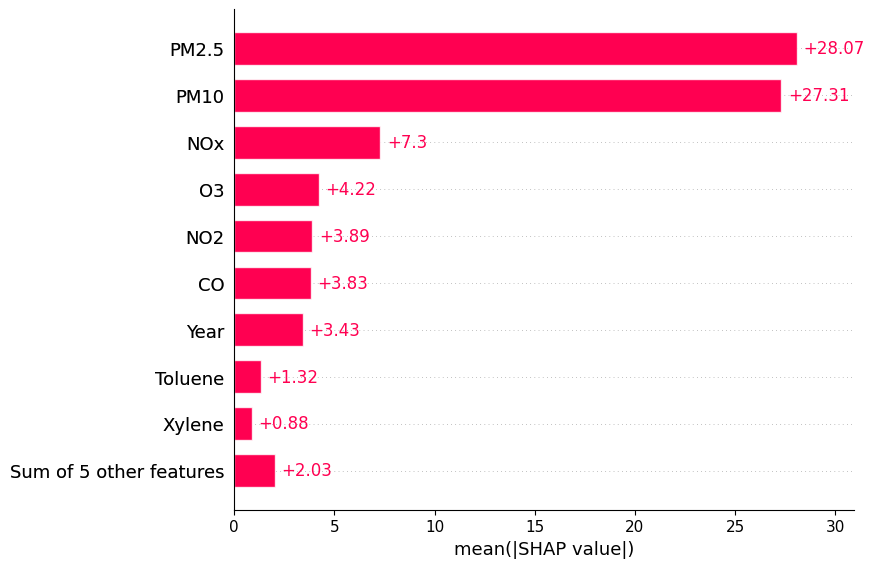

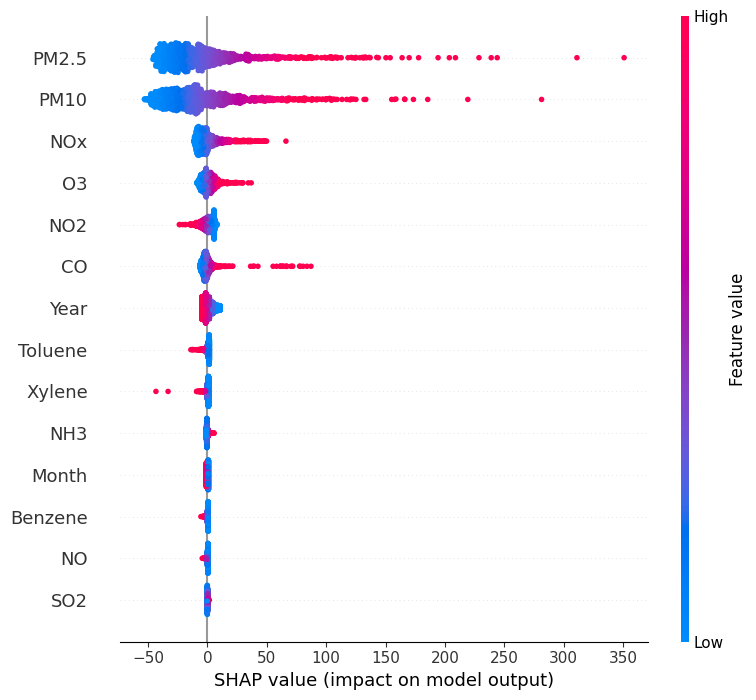

In [ ]:
# SHAP explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Global importance
shap.plots.bar(shap_values)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for one test row (corrected syntax)
shap.initjs()
shap.plots.force(shap_values[0])


**SHAP Explainability Results**

The SHAP bar plot shows that PM2.5 is the most influential feature in determining AQI, followed by PM10. Pollutants such as NOx, O3 and NO2 have moderate influence, while CO and Year also contribute meaningfully. Toluene and Xylene have smaller but still noticeable impact. This ranking matches real air quality behaviour where particulate matter is usually the dominant driver of AQI values.

The SHAP summary plot gives a deeper view of each feature’s effect. Red points represent high pollutant values that tend to increase AQI, while blue points represent low values that usually decrease AQI. The spread and colour patterns appear normal and consistent with known pollution relationships. The force plot also loads correctly and clearly shows how individual features push a single AQI prediction higher or lower.